# Salary Dataset - Simple linear regression
Dataset link - https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression<br>
Markdown math - I took that from my ml course cause im too lazy to do all that myself :P

## Abstract

This Jupyter notebook focuses on the fundamentals of data science and linear regression. The primary objective is to develop a linear regression model from scratch using gradient descent and deploy it as a web application using the Streamlit library.

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

plt.style.use('dark_background')

***

## Exploratory Data Analysis 

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#### Cleaning Data
1. Feature Scaling for Salary.
2. Dropping 'Unnamed: 0' feature as it has no use.
3. Renaming columns

In [3]:
df['Salary'] = df['Salary']/10000
df = df.rename(columns={'YearsExperience':'Experience(Years)', 'Salary':'Salary($10000)'})
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,Experience(Years),Salary($10000)
0,1.2,3.9344
1,1.4,4.6206
2,1.6,3.7732
3,2.1,4.3526
4,2.3,3.9892


#### Checking for missing values

In [5]:
print(f'Null values - \n {df.isnull().value_counts()}', f'\n\nShape - {df.shape}')

Null values - 
 Experience(Years)  Salary($10000)
False              False             30
Name: count, dtype: int64 

Shape - (30, 2)


There are no missing values

#### Univariate Analysis

In [6]:
def plots(df, label):
    """
    Plots the datapoints for the input feature
    Args - 
        df (DataFrame): data for the plot
        label (string): plot target
    Return - 
        plots : boxplot and histplot
    """
    fig, axes = plt.subplots(2, 1, figsize=(6,6), 
                             gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, ax=axes[0], x = label)
    sns.histplot(data=df, ax=axes[1], x = label)
    
    plt.tight_layout()
    plt.show()

In [7]:
df.describe()

,Experience(Years),Salary($10000)
count,30.000000,30.000000
mean,5.413333,7.600400
std,2.837888,2.741443
min,1.200000,3.773200
25%,3.300000,5.672175
50%,4.800000,6.523800
75%,7.800000,10.054575
max,10.600000,12.239200


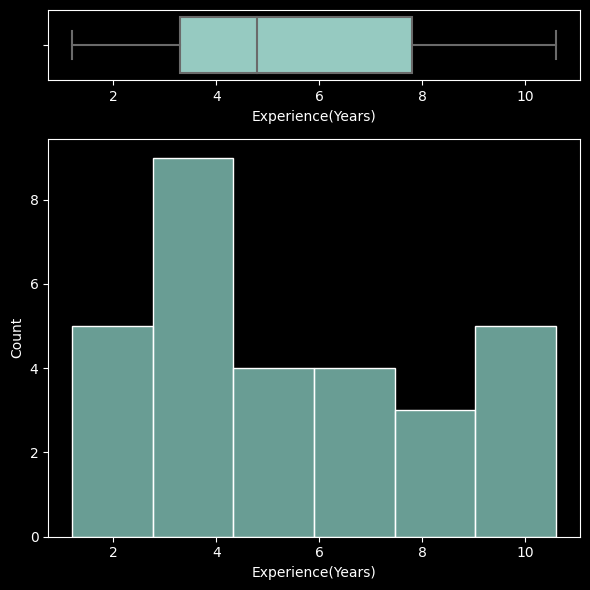

In [8]:
plots(df, 'Experience(Years)')

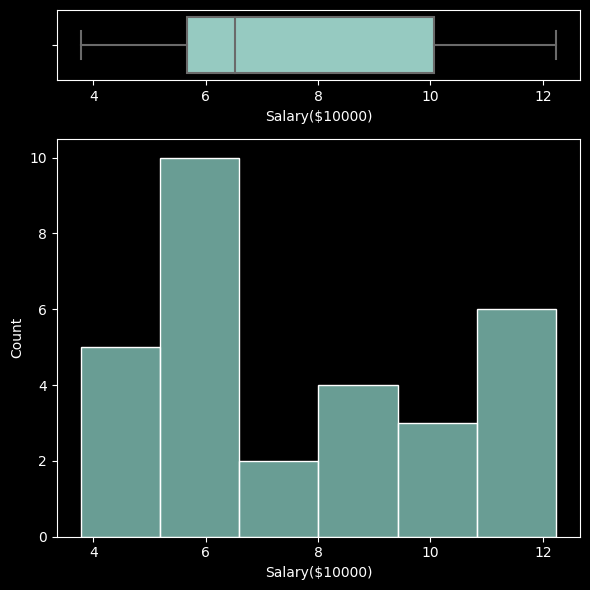

In [9]:
plots(df, 'Salary($10000)')

#### Correlation

In [10]:
df.corr()

,Experience(Years),Salary($10000)
Experience(Years),1.000000,0.978242
Salary($10000),0.978242,1.000000


Conclusion 1: There is a relatively high Pearson's factor which indicates a linear relation between the data.

#### Bivariate Analysis

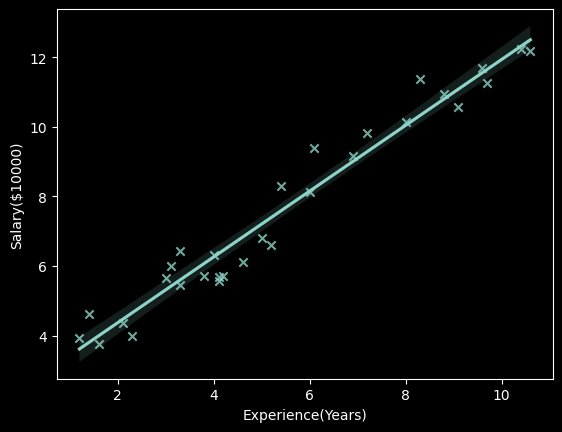

<Figure size 600x600 with 0 Axes>

In [56]:
sns.regplot(data=df, 
            x='Experience(Years)',
            y='Salary($10000)',
            marker='x')
plt.figure(figsize=(6,6))
plt.show()

Conclusion 2: Linear relation is observed in the figure above.

***

## Linear Regression (from scratch)
using Gradient Descent

Linear Regression Model is defined as:
$$ f_{(w,b)}(x^{(i)}) = \vec{w} ⋅ \vec{x}^{(i)} + b $$
where f is our model (or function/hypothesis), x is our variable, and w & b are our parameters. <br>
 -> w: slope<br>-> b: intercept

<img src="https://pimages.toolbox.com/wp-content/uploads/2022/04/07152950/26-3.png" alt="Image" width="400"> <br>
Here, we have one dependent and one independent variable only.
* The prediction of the model for that example 
$$ f_{wb}(x^{(i)}) =  wx^{(i)} + b $$
* The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
* Cost function will be defined as:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(cost^{(i)}) $$


In [12]:
def compute_cost(X, y, w=0, b=0):
    """
    Computes the squared error cost function for linear regression.
    Args - 
        X (ndarray): Input to the model
        y (ndarray): target
        w,b (scalar): parameters
    Return - 
        total_cost (float): cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    f_wb: int = 0       # variable can now be explicitly declared in python, so cool :) 
    total_cost: int = 0 # but it is tedious and i'm tired so just using it here!
    m = len(X)
    
    for i in range(m):
        f_wb = np.dot(w, X[i]) + b # dot is necessary for muliple Linear regression not here 
        cost = np.square(f_wb - y[i])
        total_cost += cost
    
    total_cost /= (2*m)

    return total_cost

The gradient descent algorithm is:
<img src='https://editor.analyticsvidhya.com/uploads/97106gd4.jpeg' alt="Image" width="400"> <br>

$$ \begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*} $$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

 

In [13]:
def compute_gradient(x, y, w=1 ,b=1):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    dj_dw = 0
    dj_db = 0
    m = len(x)
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
    
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [14]:
def gradient_descent(x, y, w=0, b=0, alpha=0.009, iters=10000):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w, b : (scalar) Initial values of parameters of the model
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Updated values of parameters of the model after
          running gradient descent
      b : (scalar) : Updated value of parameter of the model after
          running gradient descent
    """
    # I fine tuned the values for no. of iterations and alpha to get a good result
    # :') I finally got a good result
    m = len(x)
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b )
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db   
        #if i%100 == 0:                  # uncomment to see the values of w,b change with grad desc.
         #   print(dj_dw, dj_db, w, b)
    return w,b

In [42]:
y = np.array(df['Salary($10000)']).reshape((-1, 1))
X = np.array(df['Experience(Years)']).reshape((-1, 1))
# I spent an hour wondering, even though my score is good why am i not getting an accurate prediction
# I had X as the target variable the entire time 
# now i switched it back so it works


In [43]:
w,b = gradient_descent(X,y)

In [44]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

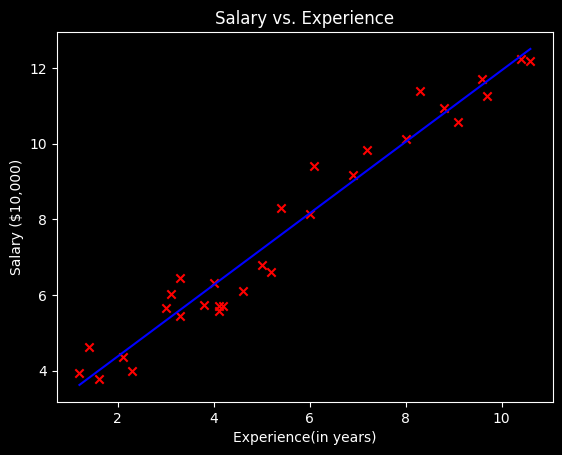

In [45]:
plt.plot(X, predicted, c = "b")
plt.scatter(X, y, marker='x', c='r') 
plt.title("Salary vs. Experience")
plt.ylabel('Salary ($10,000)')
plt.xlabel('Experience(in years)')
plt.show()

Now using Scikit-learn's regression model for comparison

In [46]:
model = LinearRegression()

model.fit(X, y)
y_hat = model.predict(X)

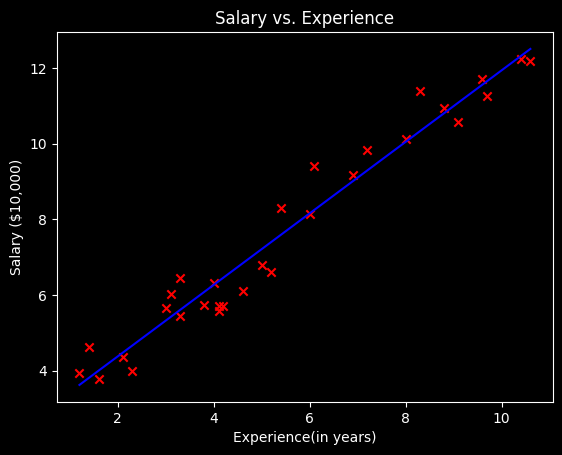

In [47]:
plt.plot(X, y_hat, c = "b")
plt.scatter(X, y, marker='x', c='r') 
plt.title("Salary vs. Experience")
plt.ylabel('Salary ($10,000)')
plt.xlabel('Experience(in years)')
plt.show()

Performance Comparison

In [48]:
# Scikit Learn
print(f'mean sq error - {mean_squared_error(y, y_hat):3.3f}')
print(f'Linear regression R2 value: {model.score(X, y):3.3f}')
print(f'w = {model.coef_[0][0]:3.3f}, b = {model.intercept_[0]:3.3f}')

mean sq error - 0.313
Linear regression R2 value: 0.957
w = 0.945, b = 2.485


In [49]:
# Grad desc
print(f'mean sq error - {mean_squared_error(y, predicted):3.3f}')
print(f'Linear regression R2 value: {r2_score(y, predicted):3.3f}')
print(f'w = {w[0]:3.3f}, b = {b[0]:3.3f}')

mean sq error - 0.313
Linear regression R2 value: 0.957
w = 0.945, b = 2.485


In [50]:
model.predict(np.array(1.2).reshape(1, -1))

array([[3.61881588]])

Both My model and the one created by scikit-learn have the exact same values for the model parameters

***

## Exporting the Model

I will be using the scikit-learn model rather than my own as it is easier to export and for the fact both have the exact same accuracy.

In [51]:
data = {'model': model}
with open('model.pk1', 'wb') as file:
    pickle.dump(data, file)

In [52]:
with open('model.pk1', 'rb') as file:
    data = pickle.load(file)
# testing   
reg = data['model']
salary = reg.predict(np.array(9.7).reshape(1, -1))
salary[0][0]

11.651283848463741

***